# Importing libraries

In [137]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import shutil
import random
import visualkeras

# Preparing folders

In [ ]:
#function for creating folders to differentiate between food and non food

def create_dir(directory_name):

    try:
        # Create target Directory
        os.mkdir(directory_name)
        print("Directory " , directory_name ,  " Created ") 
        
    except FileExistsError:
        print("Directory " , directory_name ,  " already exists")

In [ ]:
#creating the folders food and non_food and moving files according to their labeling

training_dir = "/Users/mac/Downloads/Food-5K/Food-5K/training"
validation_dir = "/Users/mac/Downloads/Food-5K//Food-5K/validation"
test_dir = "/Users/mac/Downloads/Food-5K//Food-5K/evaluation"

#directories = [training_dir, validation_dir, test_dir]
directories = [training_dir,validation_dir,test_dir]

for directory in directories:
    
    #creating the directories food and non_food
    create_dir(directory+'/food')
    create_dir(directory+'/non_food')
    
    print(directory)
    
    #moving files from main directory to food or non_food
    for image in os.listdir(directory):
        
        if image.startswith('1'):
            
            shutil.move(directory+'/'+image, directory+'/food')
        
        if image.startswith('0'):
            
            shutil.move(directory+'/'+image, directory+'/non_food')

# Question 1

In [73]:
#Question 1: getting number of images per category
training_dir = "/Users/mac/Downloads/Food-5K/Food-5K/training"
validation_dir = "/Users/mac/Downloads/Food-5K//Food-5K/validation"
test_dir = "/Users/mac/Downloads/Food-5K//Food-5K/evaluation"


print('Training')
print(str(len([image for image in os.listdir(training_dir+'/food/')])) + ' food images')
print(str(len([image for image in os.listdir(training_dir+'/non_food/')])) + ' non food images')


print('---')


print('Validation')
print(str(len([image for image in os.listdir(validation_dir+'/food/')])) + ' food images')
print(str(len([image for image in os.listdir(validation_dir+'/non_food/')])) + ' non food images')

Training
1500 food images
1500 non food images
---
Validation
500 food images
500 non food images


# Question 2

In [133]:
# defining function to plot images
def plot_5_first_images(directory,title):
    
    fig = plt.figure(figsize=(15, 10))
    # setting values to rows and column variables
    rows = 3
    columns = 2
    
    fig.suptitle(title, fontsize=16)
    
    image_list = [image for image in os.listdir(directory)]
    
    for index in range(1,6):
        
        image = cv2.imread(directory+ random.choice(image_list))
        
        # displaying image
        fig.add_subplot(rows, columns, index)
        plt.imshow(image)
        
        

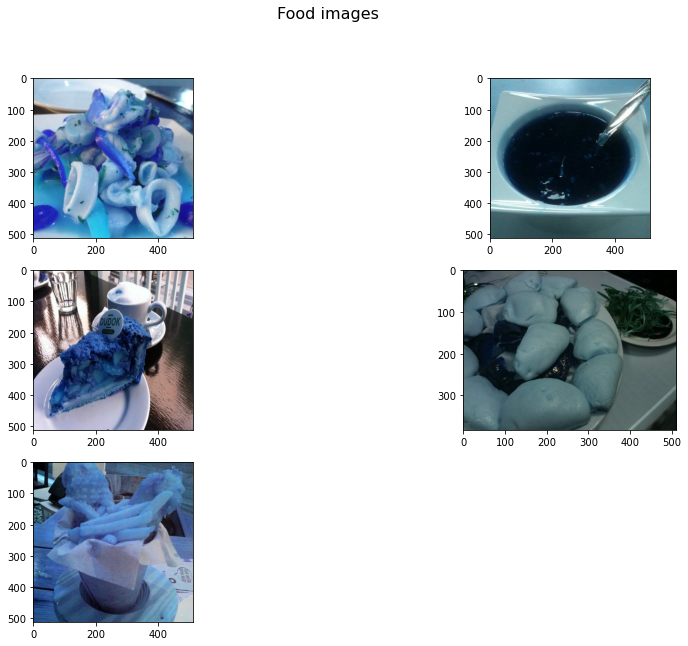

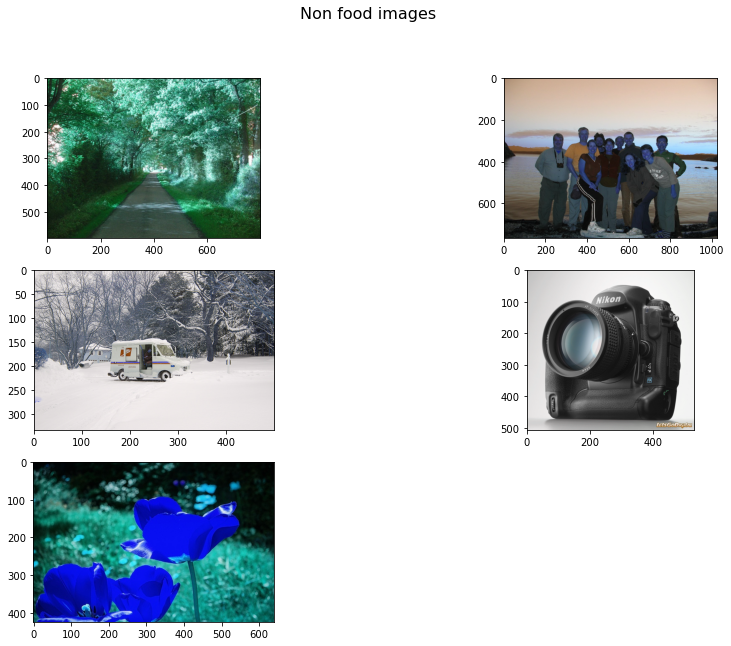

In [134]:
# applying the function on training set
plot_5_first_images(training_dir+'/food/','Food images')
plot_5_first_images(training_dir+'/non_food/','Non food images')

# Question 3

In [131]:
#creating objects to call the images (rescaled for normalized pixels)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
evaluation = ImageDataGenerator(rescale=1/255)

training_dataset = train.flow_from_directory(training_dir,
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory(validation_dir,
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = train.flow_from_directory(test_dir,
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [132]:
test_dataset.class_indices

{'food': 0, 'non_food': 1}

### Defining the CNN model

In [135]:
model = keras.Sequential()

# Layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# flatteing to 1d array
model.add(keras.layers.Flatten())

# Hidden layer 512 neurons
model.add(keras.layers.Dense(512,activation='relu'))

# output layer for binary results with sigmoid activation function 
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [136]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

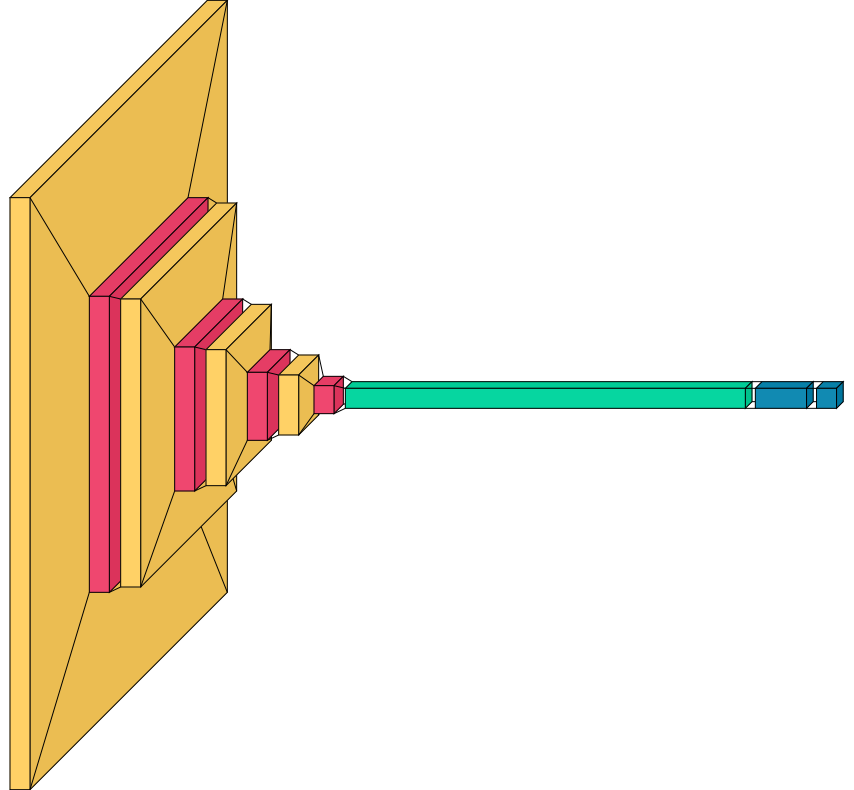

In [138]:
visualkeras.layered_view(model)

In [139]:
#compiling the model with adam optimizer and binary crossentropy since its a binary classification
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [144]:
epoch = 100

fitted_model = model.fit(training_dataset,
                         epochs = epoch,
                         validation_data = test_dataset)

Epoch 1/100
94/94 [==============================] - 94s 998ms/step - loss: 0.3233 - accuracy: 0.8630 - val_loss: 0.3456 - val_accuracy: 0.8530
Epoch 2/100
94/94 [==============================] - 88s 941ms/step - loss: 0.2606 - accuracy: 0.8893 - val_loss: 0.2982 - val_accuracy: 0.8880
Epoch 3/100
94/94 [==============================] - 89s 942ms/step - loss: 0.1979 - accuracy: 0.9193 - val_loss: 0.2825 - val_accuracy: 0.8860
Epoch 4/100
94/94 [==============================] - 89s 945ms/step - loss: 0.1788 - accuracy: 0.9233 - val_loss: 0.3502 - val_accuracy: 0.8690
Epoch 5/100
94/94 [==============================] - 89s 943ms/step - loss: 0.1416 - accuracy: 0.9417 - val_loss: 0.3294 - val_accuracy: 0.8880
Epoch 6/100
94/94 [==============================] - ETA: 0s - loss: 0.1053 - accuracy: 0.9603

KeyboardInterrupt: 

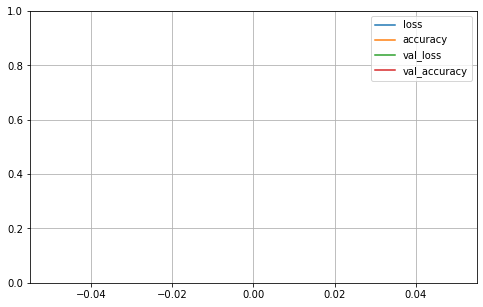

In [141]:
pd.DataFrame(fitted_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()